# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | sharan
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | taltal
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | tambo
Processing Record 13 of Set 1 | evensk
Processing Record 14 of Set 1 | grand gaube
Processing Record 15 of Set 1 | saint-francois
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | sao filipe
Processing Record 18 of Set 1 | naze
Processing Record 19 of Set 1 | halalo
City not found. Skipping...
Processing Record 20 of Set 1 | kutum
Processing Record 21 of Set 1 | imbituba
Processing Record 22 of Se

Processing Record 40 of Set 4 | griffith
Processing Record 41 of Set 4 | santa maria
Processing Record 42 of Set 4 | gogrial
Processing Record 43 of Set 4 | port-gentil
Processing Record 44 of Set 4 | haines junction
Processing Record 45 of Set 4 | brasilia
Processing Record 46 of Set 4 | san miguel
Processing Record 47 of Set 4 | ucluelet
Processing Record 48 of Set 4 | cap malheureux
Processing Record 49 of Set 4 | iqaluit
Processing Record 0 of Set 5 | olafsvik
Processing Record 1 of Set 5 | saskylakh
Processing Record 2 of Set 5 | hambantota
Processing Record 3 of Set 5 | poum
Processing Record 4 of Set 5 | ponta do sol
Processing Record 5 of Set 5 | san patricio
Processing Record 6 of Set 5 | alofi
Processing Record 7 of Set 5 | timbiqui
Processing Record 8 of Set 5 | usvyaty
Processing Record 9 of Set 5 | samusu
City not found. Skipping...
Processing Record 10 of Set 5 | longyearbyen
Processing Record 11 of Set 5 | chokurdakh
Processing Record 12 of Set 5 | rae bareli
Processing 

Processing Record 32 of Set 8 | myitkyina
Processing Record 33 of Set 8 | sao felix do xingu
Processing Record 34 of Set 8 | sioux falls
Processing Record 35 of Set 8 | port arthur
Processing Record 36 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 37 of Set 8 | osakarovka
Processing Record 38 of Set 8 | changli
Processing Record 39 of Set 8 | puerto lempira
Processing Record 40 of Set 8 | roma
Processing Record 41 of Set 8 | linqu
Processing Record 42 of Set 8 | cockburn town
Processing Record 43 of Set 8 | rokytne
Processing Record 44 of Set 8 | kushiro
Processing Record 45 of Set 8 | achisay
City not found. Skipping...
Processing Record 46 of Set 8 | clyde river
Processing Record 47 of Set 8 | thio
Processing Record 48 of Set 8 | wakkanai
Processing Record 49 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 0 of Set 9 | rocha
Processing Record 1 of Set 9 | tessalit
Processing Record 2 of Set 9 | kamenka
Processing Record 3 of Set 9 | mogok
Proce

Processing Record 15 of Set 12 | kruisfontein
Processing Record 16 of Set 12 | coahuayana
Processing Record 17 of Set 12 | phalaborwa
Processing Record 18 of Set 12 | taoudenni
Processing Record 19 of Set 12 | tete
Processing Record 20 of Set 12 | havre-saint-pierre
Processing Record 21 of Set 12 | ixtapa
Processing Record 22 of Set 12 | faya
Processing Record 23 of Set 12 | puerto narino
Processing Record 24 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 25 of Set 12 | colares
Processing Record 26 of Set 12 | verkhneye kazanishche
Processing Record 27 of Set 12 | muli
Processing Record 28 of Set 12 | pingliang
Processing Record 29 of Set 12 | yatou
Processing Record 30 of Set 12 | loandjili
Processing Record 31 of Set 12 | buchanan
Processing Record 32 of Set 12 | sawtell
Processing Record 33 of Set 12 | praia
Processing Record 34 of Set 12 | trapani
Processing Record 35 of Set 12 | sarezzo
Processing Record 36 of Set 12 | sayyan
Processing Record 37 of Set 12 | bil

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [5]:
# Convert Kelvin to Celcius
def K_to_C(x):
    return x-273.15

city_data_df['Max Temp'] = city_data_df['Max Temp'].apply(K_to_C)


# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carnarvon,-24.8667,113.6333,18.88,64,8,6.42,AU,1667832485
1,dikson,73.5069,80.5464,-13.48,92,100,5.08,RU,1667832485
2,rikitea,-23.1203,-134.9692,22.71,87,100,10.03,PF,1667832486
3,fortuna,40.5982,-124.1573,6.19,96,100,6.17,US,1667832486
4,atuona,-9.8000,-139.0333,24.58,71,100,5.77,PF,1667832486


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carnarvon,-24.8667,113.6333,18.88,64,8,6.42,AU,1667832485
1,dikson,73.5069,80.5464,-13.48,92,100,5.08,RU,1667832485
2,rikitea,-23.1203,-134.9692,22.71,87,100,10.03,PF,1667832486
3,fortuna,40.5982,-124.1573,6.19,96,100,6.17,US,1667832486
4,atuona,-9.8000,-139.0333,24.58,71,100,5.77,PF,1667832486


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

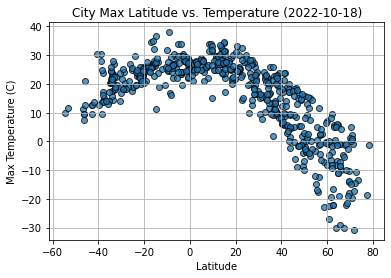

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

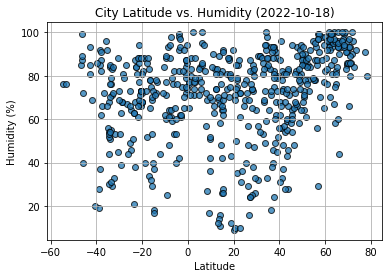

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", edgecolors="black", alpha=0.75,)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

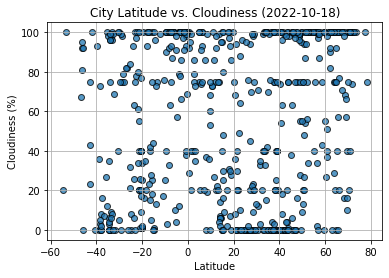

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", edgecolors="black", alpha=0.75,)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

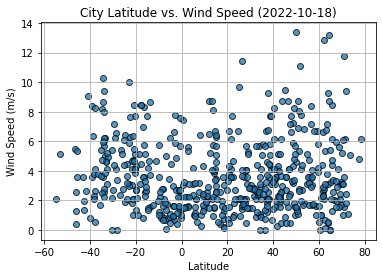

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", edgecolors="black", alpha=0.75,)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,dikson,73.5069,80.5464,-13.48,92,100,5.08,RU,1667832485
3,fortuna,40.5982,-124.1573,6.19,96,100,6.17,US,1667832486
5,sharan,54.8167,54.0000,-3.45,96,100,3.13,RU,1667832487
7,albany,42.6001,-73.9662,18.77,54,0,1.79,US,1667832253
11,evensk,61.9500,159.2333,-3.70,95,100,6.61,RU,1667832488


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carnarvon,-24.8667,113.6333,18.88,64,8,6.42,AU,1667832485
2,rikitea,-23.1203,-134.9692,22.71,87,100,10.03,PF,1667832486
4,atuona,-9.8000,-139.0333,24.58,71,100,5.77,PF,1667832486
6,arraial do cabo,-22.9661,-42.0278,23.98,68,75,3.09,BR,1667832487
8,taltal,-25.4000,-70.4833,17.48,73,32,2.79,CL,1667832338


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8555081188452882


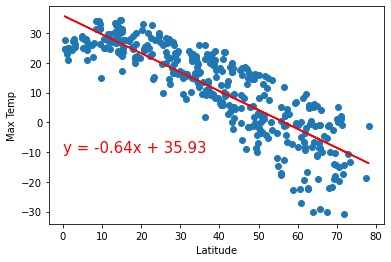

In [14]:
# Linear regression on Northern Hemisphere

# Giving the x and y variables names
north_lat = northern_hemi_df['Lat']
north_temp = northern_hemi_df['Max Temp']

# Get the slope, y-int and r value
north_temp_slope, north_temp_int, north_temp_r, north_temp_p, north_temp_std_err = linregress(north_lat, north_temp)

print(f"The r-value is: {north_temp_r}")

# Get the equation y=mx+b and placing it on the graph 
line_eq = "y = " + str(round(north_temp_slope,2)) + "x + " + str(round(north_temp_int,2))
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")

# Plotting the trend line and scatterplot
plt.scatter(north_lat, north_temp)
plt.plot(north_lat, north_temp_slope * north_lat + north_temp_int, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.632977068626744


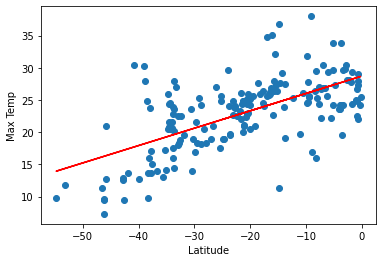

In [15]:
# Linear regression on Southern Hemisphere

# Giving the x and y variables names
south_lat = southern_hemi_df['Lat']
south_temp = southern_hemi_df['Max Temp']

# Get the slope, y-int and r value
south_temp_slope, south_temp_int, south_temp_r, south_temp_p, south_temp_std_err = linregress(south_lat, south_temp)

print(f"The r-value is: {south_temp_r}")

# Get the equation y=mx+b and placing it on the graph 
line_eq2 = "y = " + str(round(south_temp_slope,2)) + "x + " + str(round(south_temp_int,2))
plt.annotate(line_eq2,(-25,5),fontsize=15,color="red")

# Plotting the trend line and scatterplot
plt.scatter(south_lat, south_temp)
plt.plot(south_lat, south_temp_slope * south_lat + south_temp_int, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** From the two scatterplots above, we can see that as the latitude becomes closer to zero, the maximum temperature becomes higher.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3554116344208513


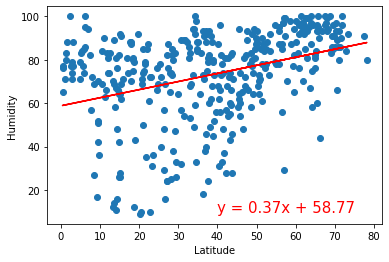

In [16]:
# Northern Hemisphere

# Giving the x and y variables names
north_humidity = northern_hemi_df['Humidity']

# Get the slope, y-int and r value
north_humidity_slope, north_humidity_int, north_humidity_r, north_humidity_p, north_humidity_std_err = linregress(north_lat, north_humidity)

print(f"The r-value is: {north_humidity_r}")

# Get the equation y=mx+b and placing it on the graph 
line_eq3 = "y = " + str(round(north_humidity_slope,2)) + "x + " + str(round(north_humidity_int,2))
plt.annotate(line_eq3,(40,10),fontsize=15,color="red")

# Plotting the trend line and scatterplot
plt.scatter(north_lat, north_humidity)
plt.plot(north_lat, north_humidity_slope * north_lat + north_humidity_int, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.10093619265790514


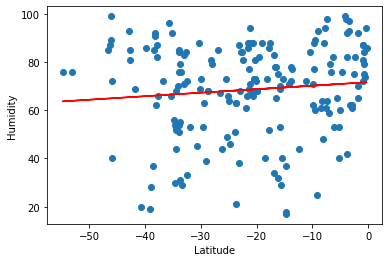

In [17]:
# Southern Hemisphere

# Giving the x and y variables names
south_humidity = southern_hemi_df['Humidity']

# Get the slope, y-int and r value
south_humidity_slope, south_humidity_int, south_humidity_r, south_humidity_p, south_humidity_std_err = linregress(south_lat, south_humidity)

print(f"The r-value is: {south_humidity_r}")

# Get the equation y=mx+b and placing it on the graph 
line_eq4 = "y = " + str(round(south_humidity_slope,2)) + "x + " + str(round(south_humidity_int,2))
plt.annotate(line_eq4,(-25,5),fontsize=15,color="red")

# Plotting the trend line and scatterplot
plt.scatter(south_lat, south_humidity)
plt.plot(south_lat, south_humidity_slope * south_lat + south_humidity_int, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** Based on the two trend lines and r values above, I would argue that there is not really a correlation between Latitude and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2296893472311732


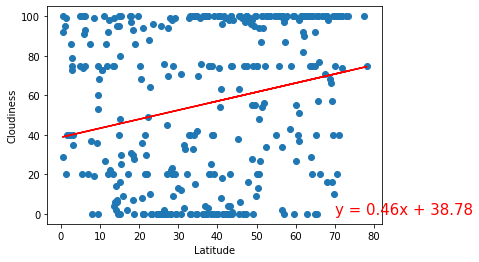

In [18]:
# Northern Hemisphere

# Giving the x and y variables names
north_cloudiness = northern_hemi_df['Cloudiness']

# Get the slope, y-int and r value
north_cloudiness_slope, north_cloudiness_int, north_cloudiness_r, north_cloudiness_p, north_cloudiness_std_err = linregress(north_lat, north_cloudiness)

print(f"The r-value is: {north_cloudiness_r}")

# Get the equation y=mx+b and placing it on the graph 
line_eq5 = "y = " + str(round(north_cloudiness_slope,2)) + "x + " + str(round(north_cloudiness_int,2))
plt.annotate(line_eq5,(70,0),fontsize=15,color="red")

# Plotting the trend line and scatterplot
plt.scatter(north_lat, north_cloudiness)
plt.plot(north_lat, north_cloudiness_slope * north_lat + north_cloudiness_int, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: 0.2960408698796946


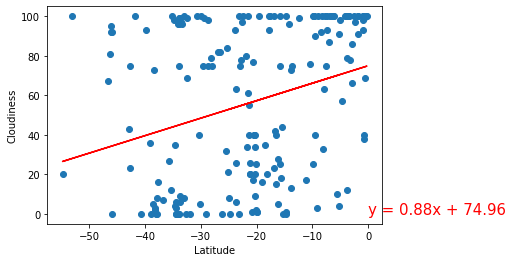

In [19]:
# Southern Hemisphere

# Giving the x and y variables names
south_cloudiness = southern_hemi_df['Cloudiness']

# Get the slope, y-int and r value
south_cloudiness_slope, south_cloudiness_int, south_cloudiness_r, south_cloudiness_p, south_cloudiness_std_err = linregress(south_lat, south_cloudiness)

print(f"The r-value is: {south_cloudiness_r}")

# Get the equation y=mx+b and placing it on the graph 
line_eq6 = "y = " + str(round(south_cloudiness_slope,2)) + "x + " + str(round(south_cloudiness_int,2))
plt.annotate(line_eq6,(0,0),fontsize=15,color="red")

# Plotting the trend line and scatterplot
plt.scatter(south_lat, south_cloudiness)
plt.plot(south_lat, south_cloudiness_slope * south_lat + south_cloudiness_int, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** Cloudiness and latitude do not appear to have a correlation. The southern cloudiness appears to have positive trend from the trend line but the points tell us a different story.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1605320469380035


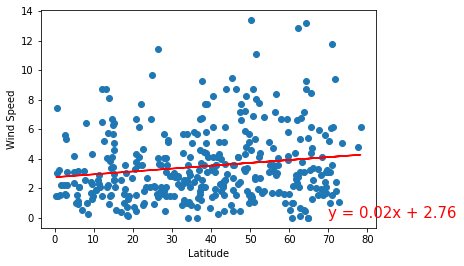

In [20]:
# Northern Hemisphere

# Giving the x and y variables names
north_wind = northern_hemi_df['Wind Speed']

# Get the slope, y-int and r value
north_wind_slope, north_wind_int, north_wind_r, north_wind_p, north_wind_std_err = linregress(north_lat, north_wind)

print(f"The r-value is: {north_wind_r}")

# Get the equation y=mx+b and placing it on the graph 
line_eq7 = "y = " + str(round(north_wind_slope,2)) + "x + " + str(round(north_wind_int,2))
plt.annotate(line_eq7,(70,0),fontsize=15,color="red")

# Plotting the trend line and scatterplot
plt.scatter(north_lat, north_wind)
plt.plot(north_lat, north_wind_slope * north_lat + north_wind_int, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: -0.2515924607097398


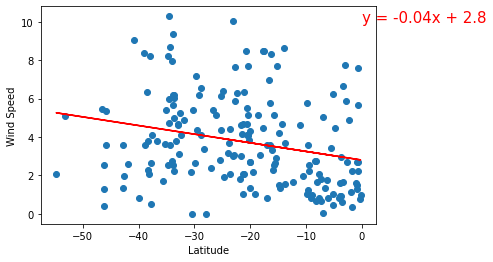

In [21]:
# Southern Hemisphere

# Giving the x and y variables names
south_wind = southern_hemi_df['Wind Speed']

# Get the slope, y-int and r value
south_wind_slope, south_wind_int, south_wind_r, south_wind_p, south_wind_std_err = linregress(south_lat, south_wind)

print(f"The r-value is: {south_wind_r}")

# Get the equation y=mx+b and placing it on the graph 
line_eq8 = "y = " + str(round(south_wind_slope,2)) + "x + " + str(round(south_wind_int,2))
plt.annotate(line_eq8,(0,10),fontsize=15,color="red")

# Plotting the trend line and scatterplot
plt.scatter(south_lat, south_wind)
plt.plot(south_lat, south_wind_slope * south_lat + south_wind_int, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** The southern trend line makes it appear as though the wind speeds slow down as you get closer to 0 latitude, but there is no trend on the northern hemisphere. 